#data Preprocessing

dataset link:https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

#importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor


In [ ]:
medical = pd.read_csv('/content/insurance.csv')

In [ ]:
def toprowmedical():#shows top 5 rows of dataset
  med = medical.head()
  return med

In [ ]:
def rscore():#shows the percentage of the model
  score = r2_score(y_test, y_pred)
  return score

#Data exploration

In [ ]:
toprowmedical()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical.shape

(1338, 7)

In [ ]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
len(medical.select_dtypes(include = 'object').columns)

3

In [ ]:
medical.select_dtypes(include = ['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
len(medical.select_dtypes(include =[ 'int64','float64']).columns)

4

#statistical summary

In [ ]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#group the dataset by 'sex','smoker' and 'region'

In [ ]:
medical.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [ ]:
medical.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [ ]:
medical.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


#dealing with missing values

In [ ]:
medical.isnull().values.any()

False

In [ ]:
medical.isnull().values.sum()

0

#encoding categorical data

In [ ]:
medical.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
medical['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
medical['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
medical['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
toprowmedical()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical = pd.get_dummies(data = medical,drop_first=True)

In [ ]:
toprowmedical()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
medical.shape

(1338, 9)

#correlation matrix

In [ ]:
medical2 = medical.drop(columns = 'charges')

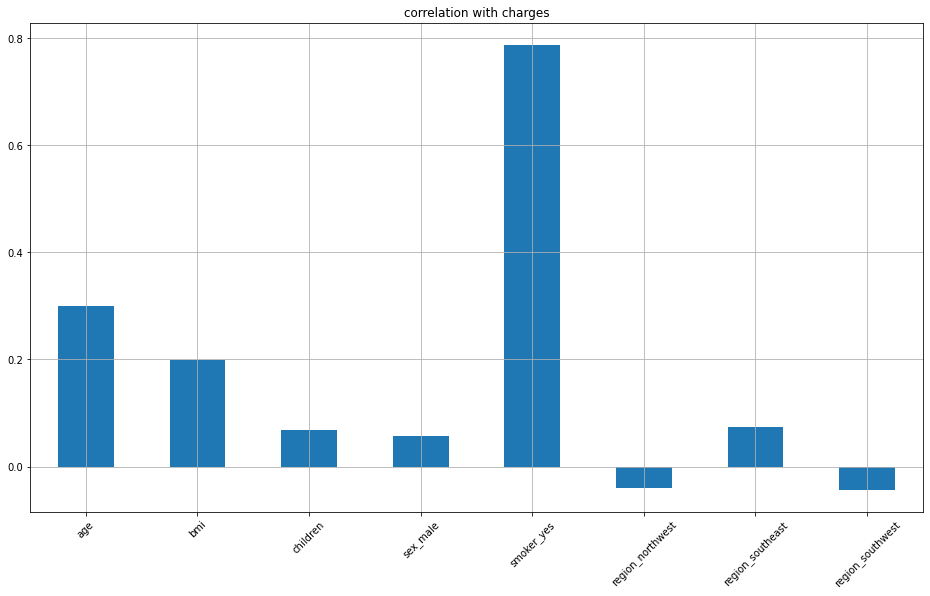

In [ ]:
medical2.corrwith(medical['charges']).plot.bar(
    figsize = (16,9),title = 'correlation with charges',rot = 45, grid = True
)

In [ ]:
corr = medical.corr()

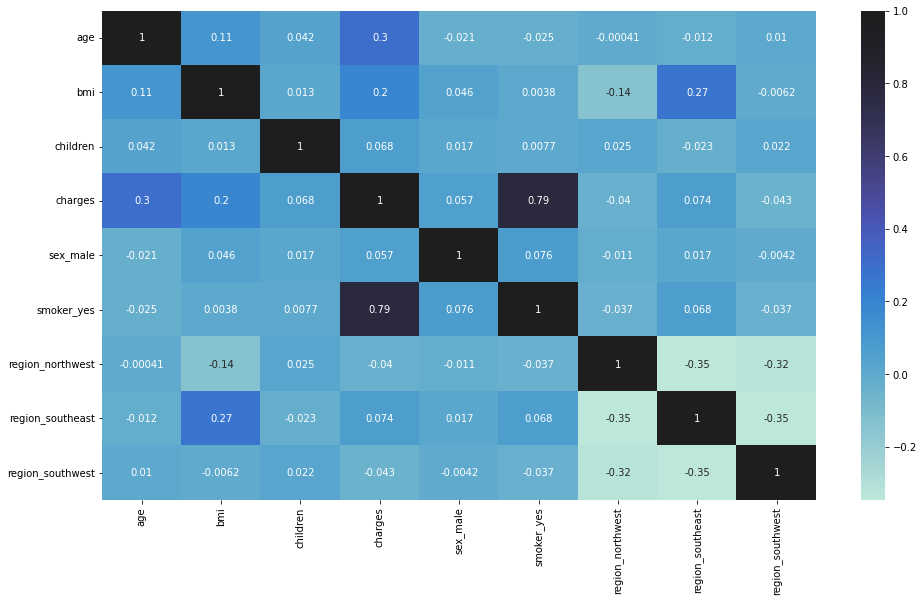

In [ ]:
#heatmap
plt.figure(figsize = (16,9))
sns.heatmap(corr,annot = True,center = True,cbar = True)

#splitting the dataset

In [ ]:
#matrix of features / independent variables
x = medical.drop(columns = 'charges')

In [ ]:
#target / dependent variable
y = medical['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=0)

In [ ]:
x_test.shape

(295, 8)

In [ ]:
y_test.shape

(295,)

In [ ]:
x_train.shape

(1043, 8)

In [ ]:
y_train.shape

(1043,)

#feature scaling

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.12816005,  0.27298569, -0.05895129, ..., -0.55704713,
        -0.61762202, -0.58952966],
       [-1.14697408,  0.1126463 , -0.88984579, ..., -0.55704713,
        -0.61762202,  1.6962675 ],
       [ 0.06169093, -0.53193414, -0.05895129, ..., -0.55704713,
        -0.61762202,  1.6962675 ],
       ...,
       [ 0.06169093, -0.90579081, -0.88984579, ..., -0.55704713,
         1.61911327, -0.58952966],
       [-1.43136585,  0.77817562, -0.88984579, ...,  1.79518023,
        -0.61762202, -0.58952966],
       [-0.43599466, -1.96612564, -0.05895129, ..., -0.55704713,
        -0.61762202,  1.6962675 ]])

In [ ]:
x_test

array([[ 0.91486623, -0.08072783, -0.05895129, ..., -0.55704713,
        -0.61762202,  1.6962675 ],
       [ 0.55937652, -0.21447827, -0.05895129, ..., -0.55704713,
         1.61911327, -0.58952966],
       [ 0.63047446,  1.58954126,  0.77194322, ...,  1.79518023,
        -0.61762202, -0.58952966],
       ...,
       [ 0.7015724 , -0.78332052, -0.05895129, ..., -0.55704713,
        -0.61762202, -0.58952966],
       [-0.57819055,  0.31891205, -0.05895129, ...,  1.79518023,
        -0.61762202, -0.58952966],
       [ 1.12816005,  0.45669112,  0.77194322, ...,  1.79518023,
        -0.61762202, -0.58952966]])

#Part 2 building the model

#Multiple linear regression

In [ ]:
rigressor_lr = LinearRegression()
rigressor_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = rigressor_lr.predict(x_test)


In [ ]:
rscore()

0.8047278228691499

#random forest regression

In [ ]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
rscore()

0.8805616429542172

#XGBoost regression

In [ ]:
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

[14:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [ ]:
y_pred = regressor_xgb.predict(x_test)

In [ ]:
rscore()

0.8817052964107156

#Predict charges for a new customer

Name: Sara, age:19, bmi:27.9, children:0, sex:female, smoker:no, region: northwest

In [ ]:
toprowmedical()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [ ]:
sara_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [ ]:
regressor_xgb.predict(sc.transform(sara_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4255.5327], dtype=float32)

#example 2

#Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [ ]:
toprowmedical()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
frank_obs = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [ ]:
regressor_xgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([37030.133], dtype=float32)